In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# generate normalized data

def normalize(trees, n):
    # https://www.datacamp.com/tutorial/principal-component-analysis-in-python
    x = trees.values
    x = StandardScaler().fit_transform(x)
    title = []
    for i in range(2**(n-1) - 1):
        title.append(i)
    normal_tree = pd.DataFrame(x, columns = title)
    return normal_tree


def PCAtrees(trees):
    # get values in dataframe
    x = trees.values
    # determine the column number
    pca = PCA(n_components = 2)
    pca_tree = pca.fit_transform(x)
    pca_df = pd.DataFrame(pca_tree, columns = ["feature0" ,"feature1"])
    return pca_df


# draw samples from trees
import random
def draw(trees, n = 1000):
    value = trees.values.tolist()
    sample = random.sample(value, n)
    sample_df = pd.DataFrame(sample)
    return sample_df


from sklearn.manifold import TSNE

def tSNEtrees(trees, label):
    x = trees.values
    tsne = TSNE(2)
    tsne_tree = tsne.fit_transform(x)
    tsne_df = pd.DataFrame(tsne_tree, columns = ["feature0" ,"feature1"])
    final_df = pd.concat([tsne_df,label], axis = 1)
    return final_df

In [2]:
from sklearn import mixture

# Gaussian mixture model https://scikit-learn.org/stable/modules/mixture.html  
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
def GMM_tree(tree, num=2):
    model = mixture.GaussianMixture(n_components=num, random_state = 0,covariance_type='full')
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

In [3]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
normal_tree = normalize(trees, 4)
label_df = GMM_tree(normal_tree, 2)
label_df.value_counts()

label
0        30052
1        19948
dtype: int64

In [4]:
def plot_cluster(tree, n=2):
    label_df = GMM_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

(None, None, None, None)

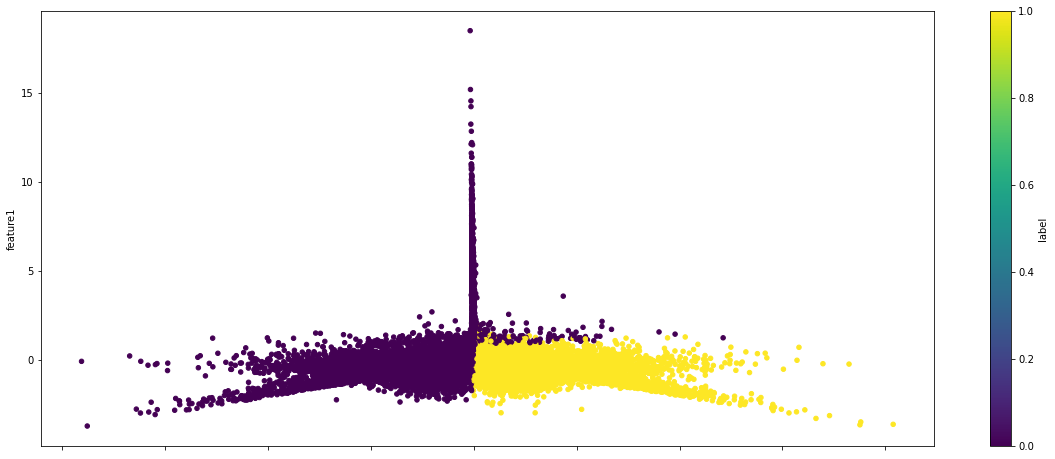

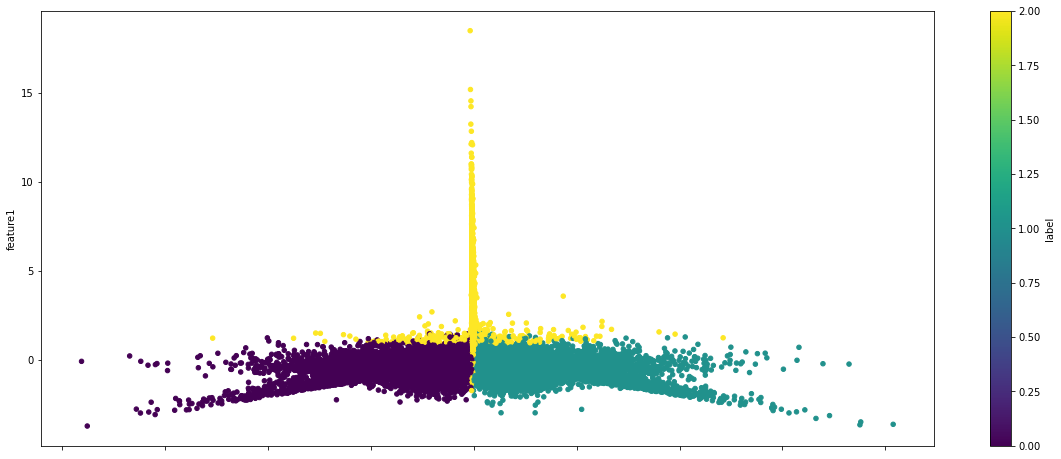

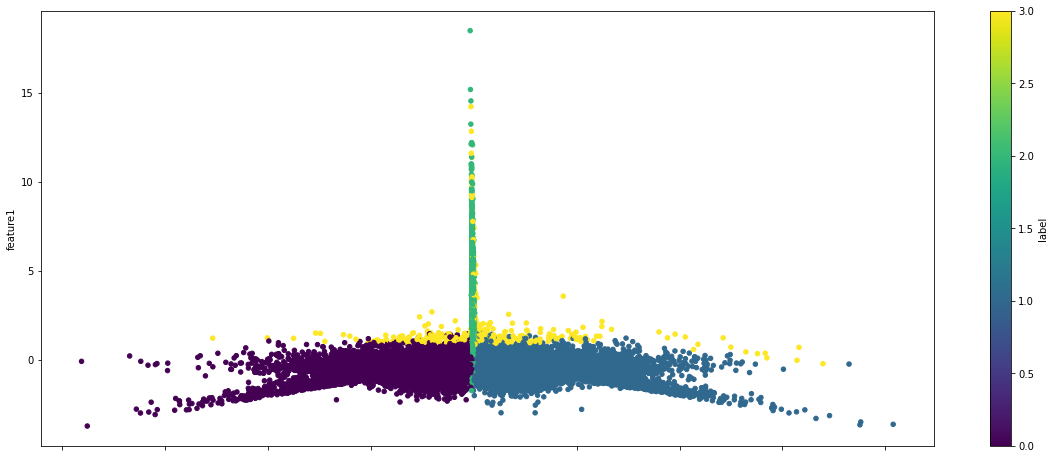

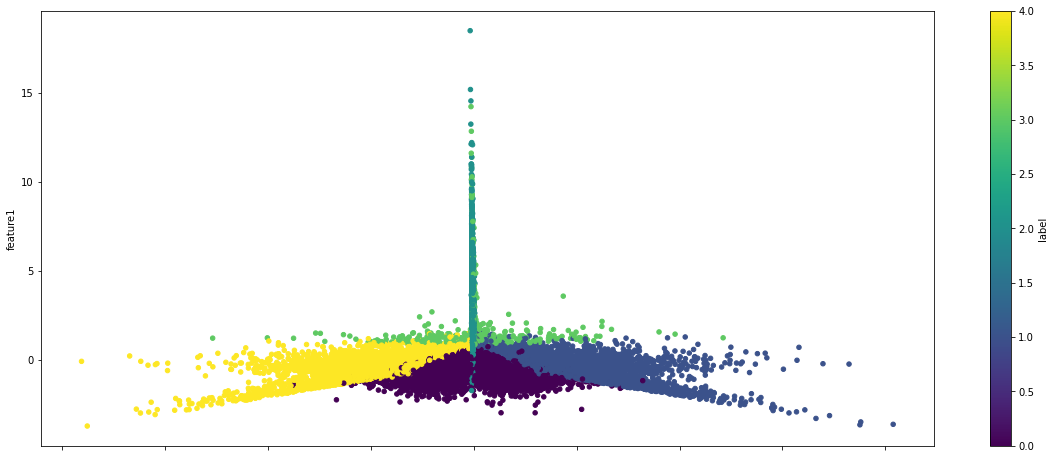

In [5]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
normal_tree = normalize(trees, 4)
plot_cluster(normal_tree, 2),plot_cluster(normal_tree, 3),plot_cluster(normal_tree, 4),plot_cluster(normal_tree, 5)

(None, None, None)

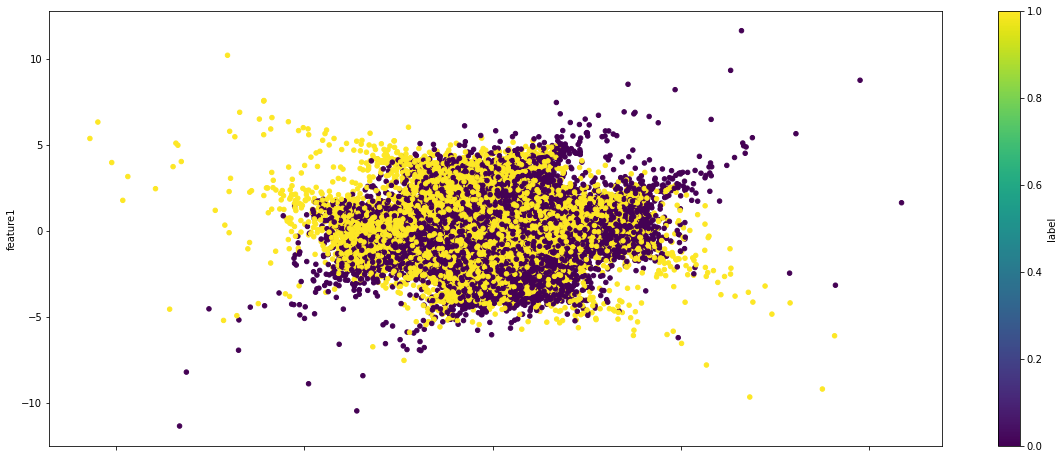

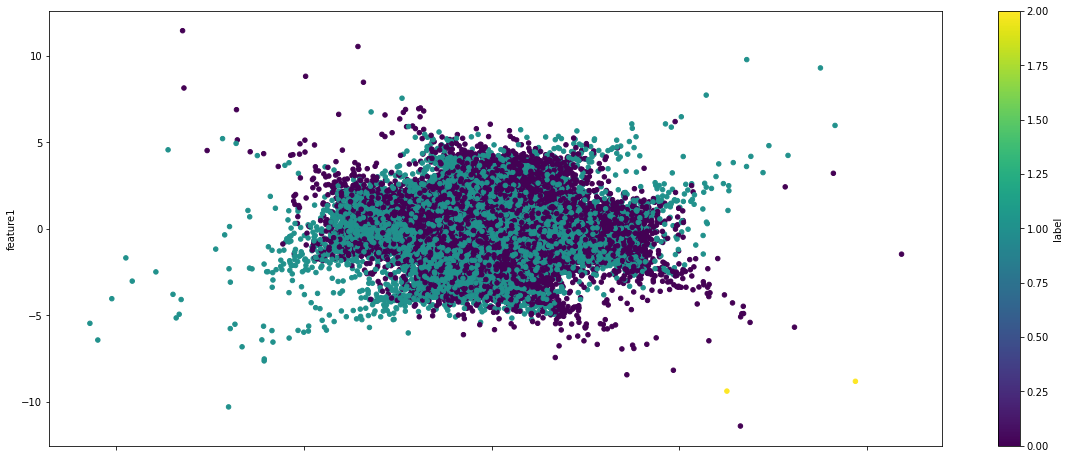

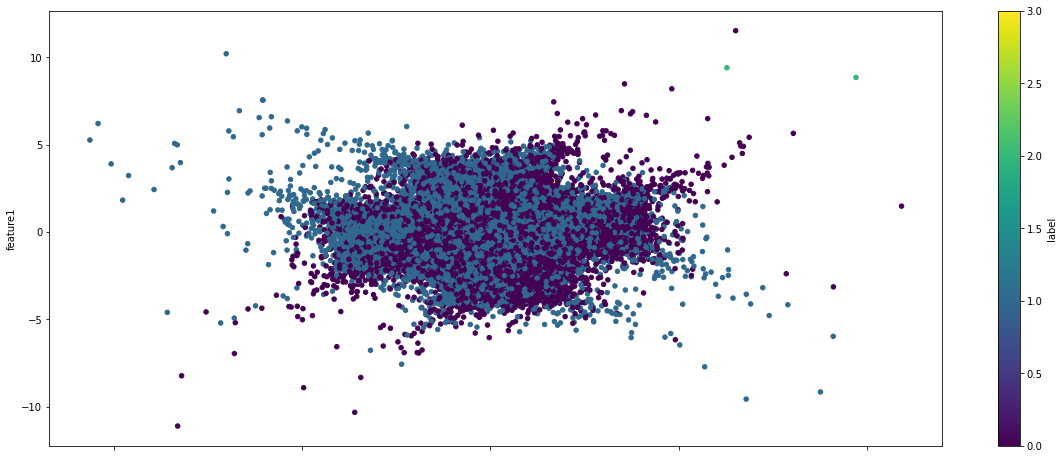

In [248]:
# test 8 taxa trees
trees = pd.read_csv("./data/bipartition_8taxa_tree.csv")
normal_tree = normalize(trees, 8)
plot_cluster(normal_tree, 2),plot_cluster(normal_tree, 3),plot_cluster(normal_tree, 4)

(None, None, None)

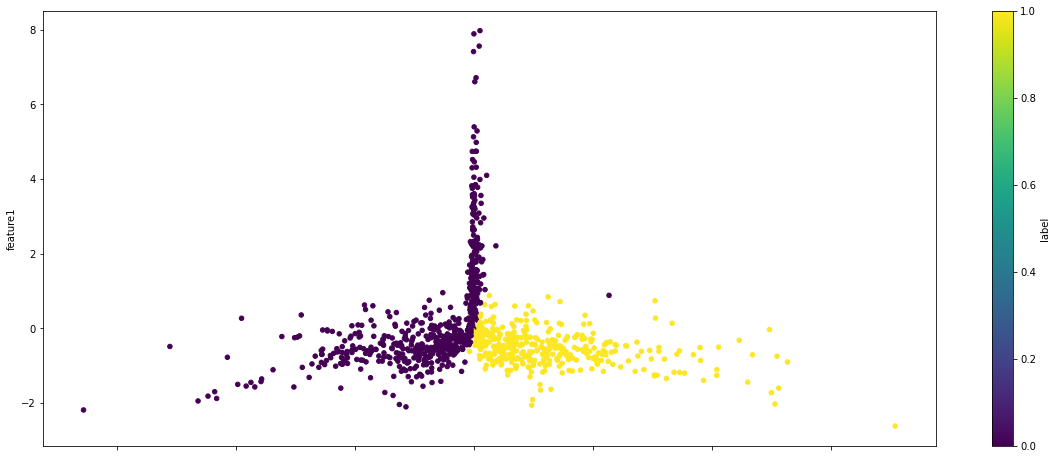

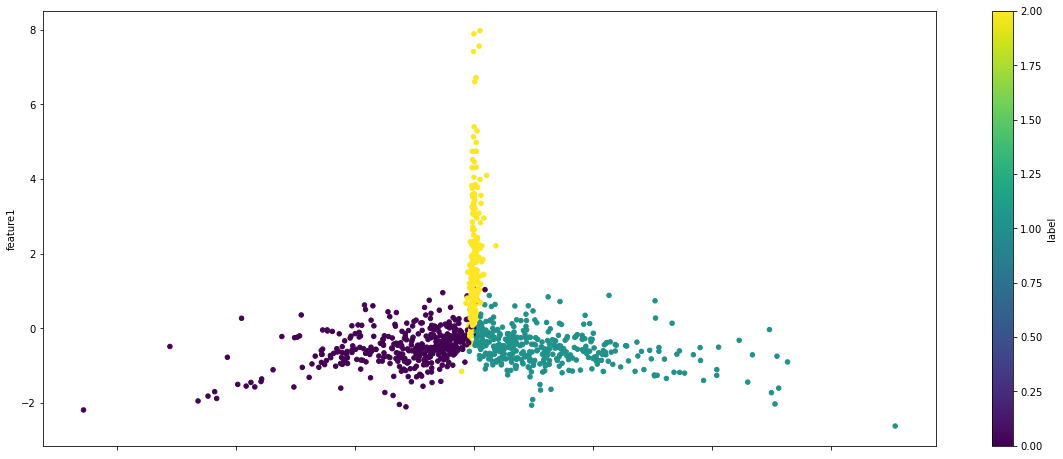

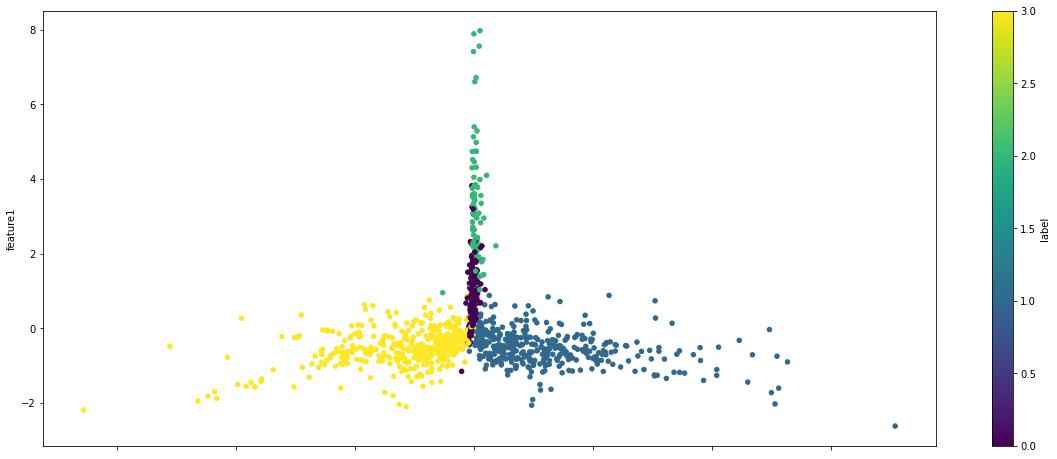

In [250]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 4)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

(None, None, None)

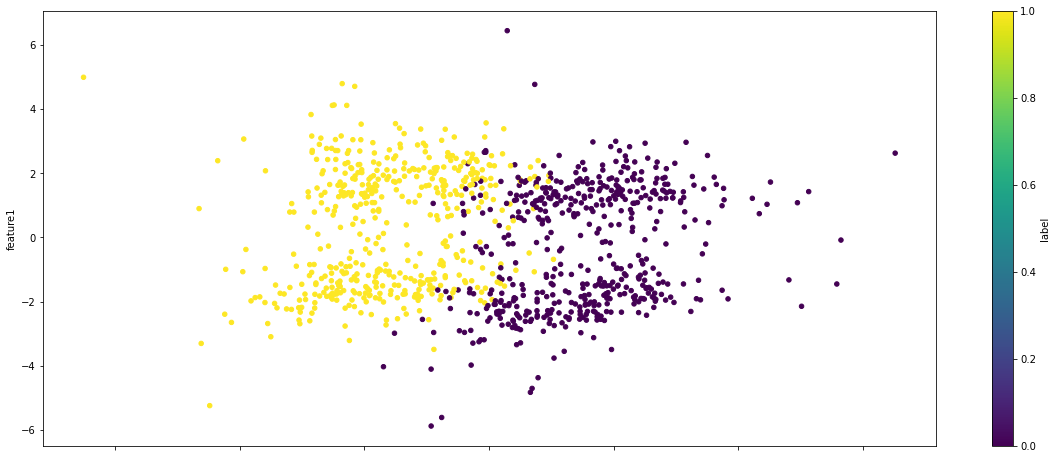

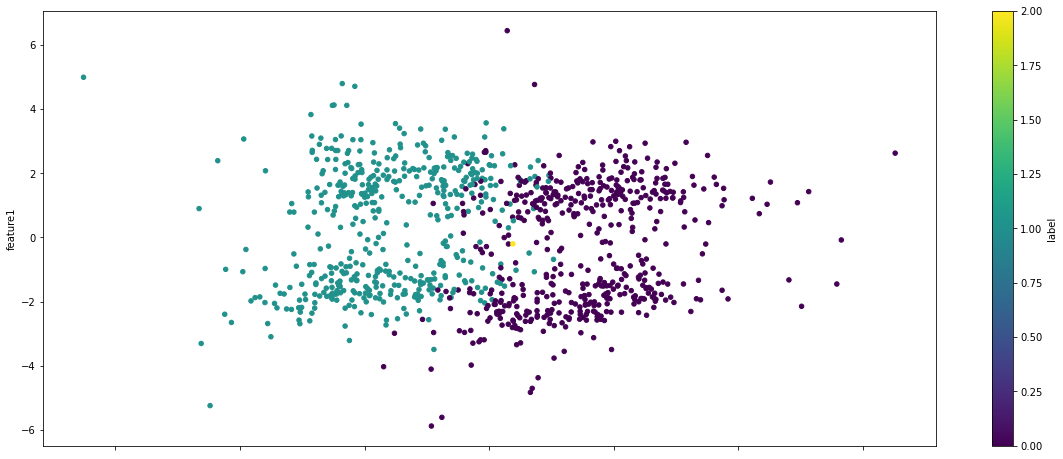

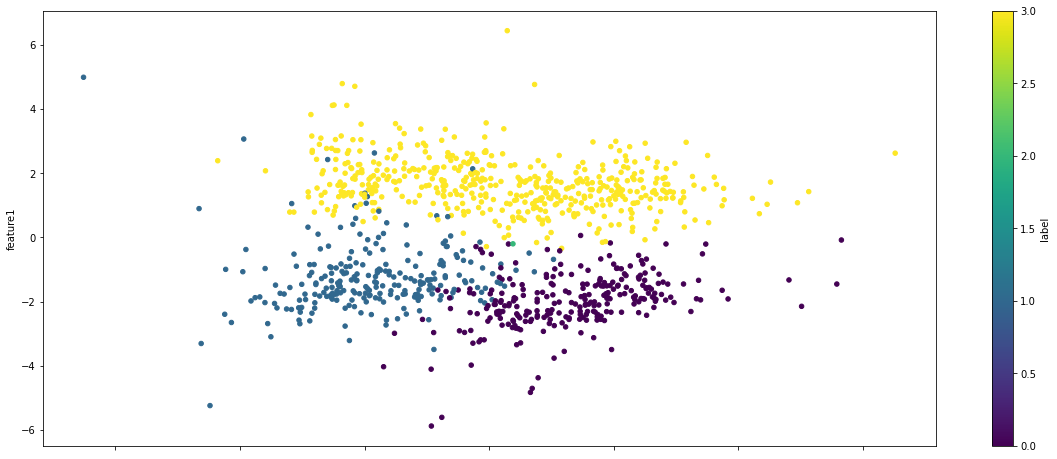

In [252]:
trees = pd.read_csv("./data/bipartition_8taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 8)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

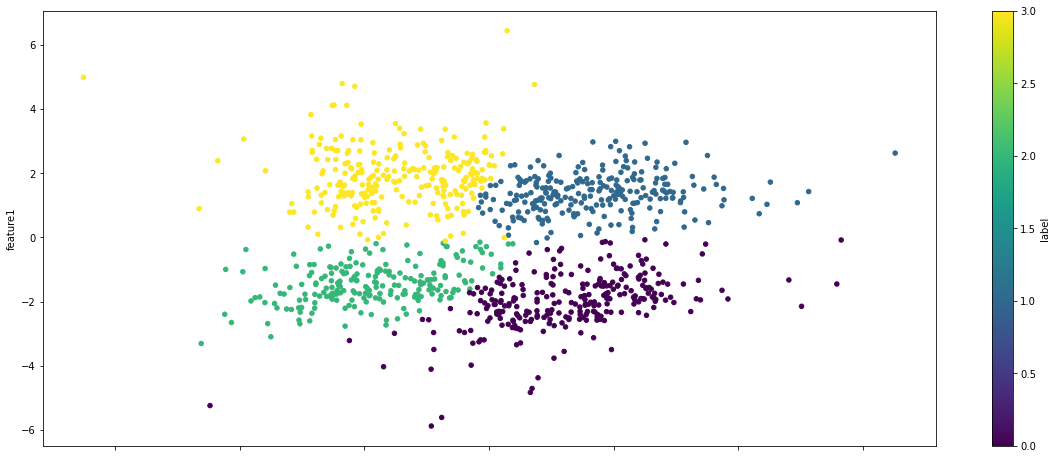

In [253]:
PCA_trees = PCAtrees(normal_sample)
label_df = GMM_tree(PCA_trees, 4)
final_df = pd.concat([PCA_trees,label_df], axis = 1)
final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

(None, None, None)

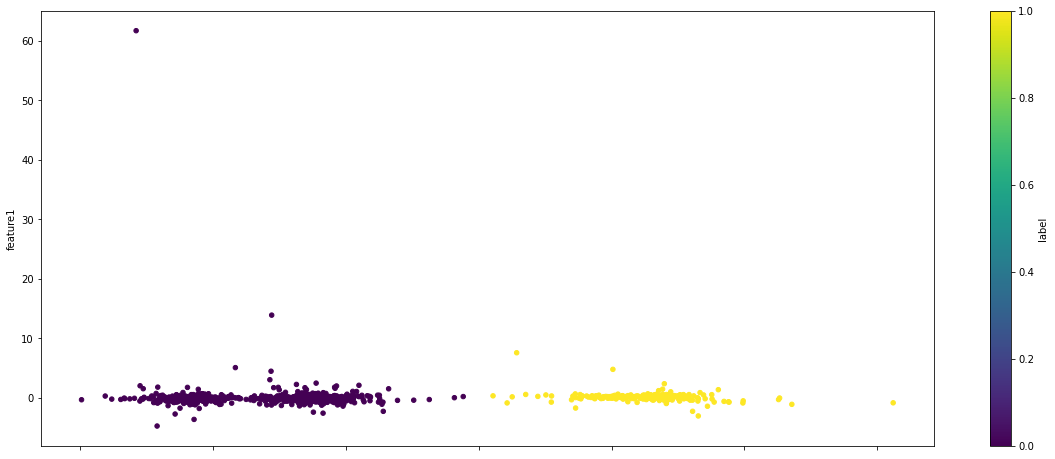

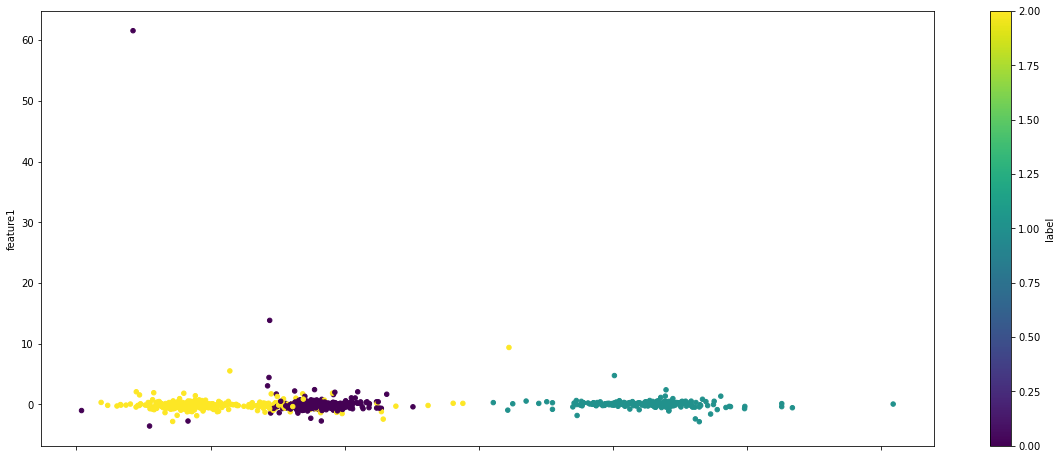

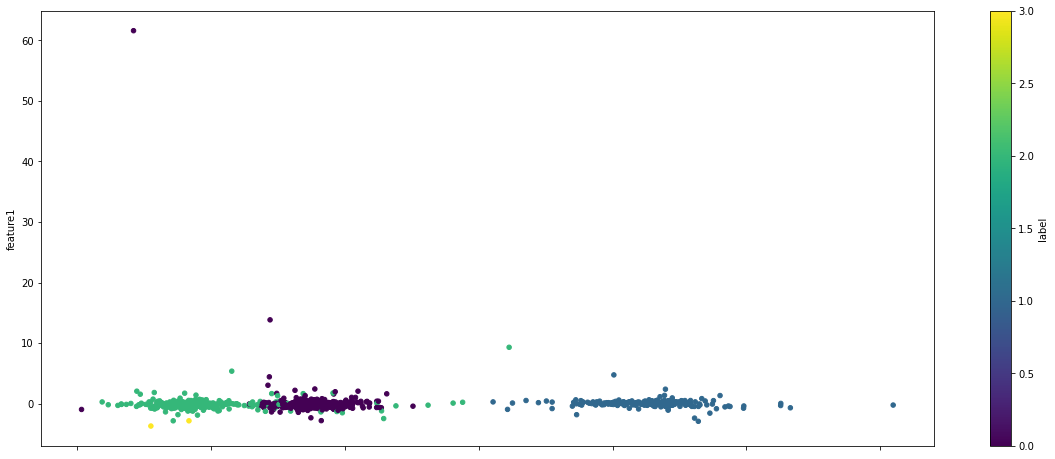

In [254]:
trees = pd.read_csv("./data/bipartition_10taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 10)
plot_cluster(normal_sample, 2),plot_cluster(normal_sample, 3),plot_cluster(normal_sample, 4)

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

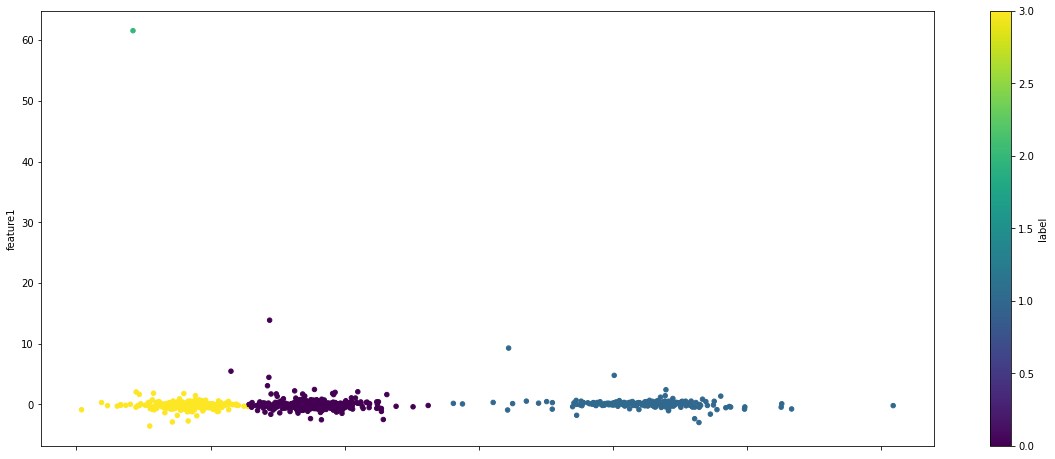

In [255]:
PCA_trees = PCAtrees(normal_sample)
label_df = GMM_tree(PCA_trees, 4)
final_df = pd.concat([PCA_trees,label_df], axis = 1)
final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='feature0', ylabel='feature1'>

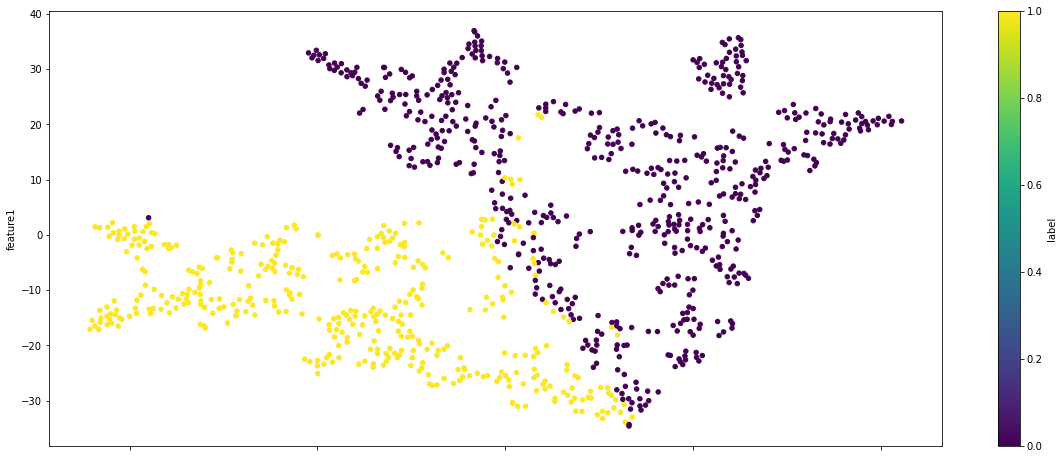

In [256]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 4)
label_df = GMM_tree(normal_sample, 2)
tSNE_tree = tSNEtrees(normal_sample, label_df)
tSNE_tree.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

In [292]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
def SC_tree(tree, num=2):
    model = SpectralClustering(n_clusters = num, random_state = 0, affinity ='rbf')
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

In [309]:
def plot_SC_cluster(tree, n=2):
    label_df = SC_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

(None, None, None)

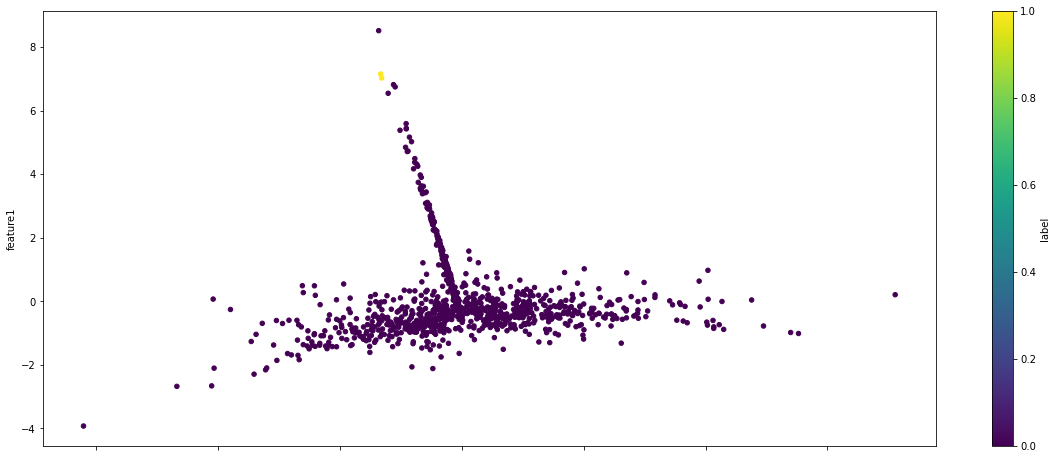

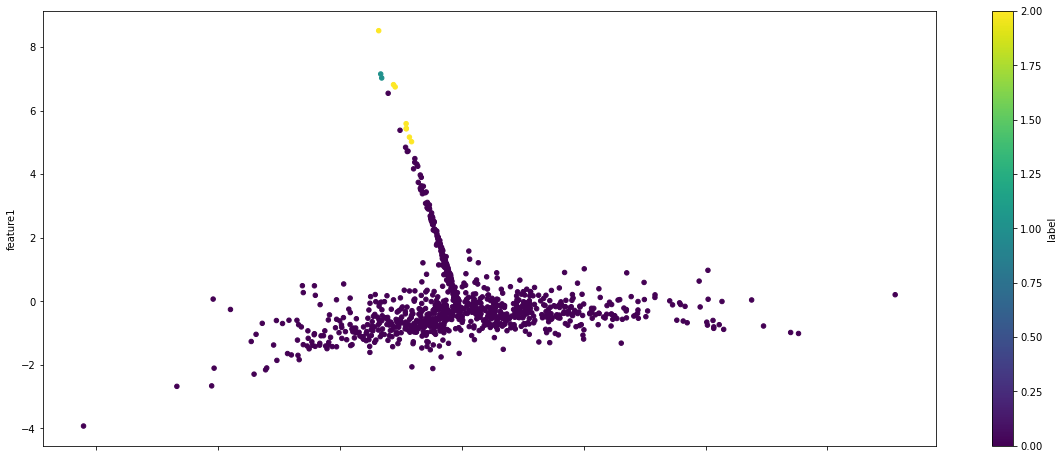

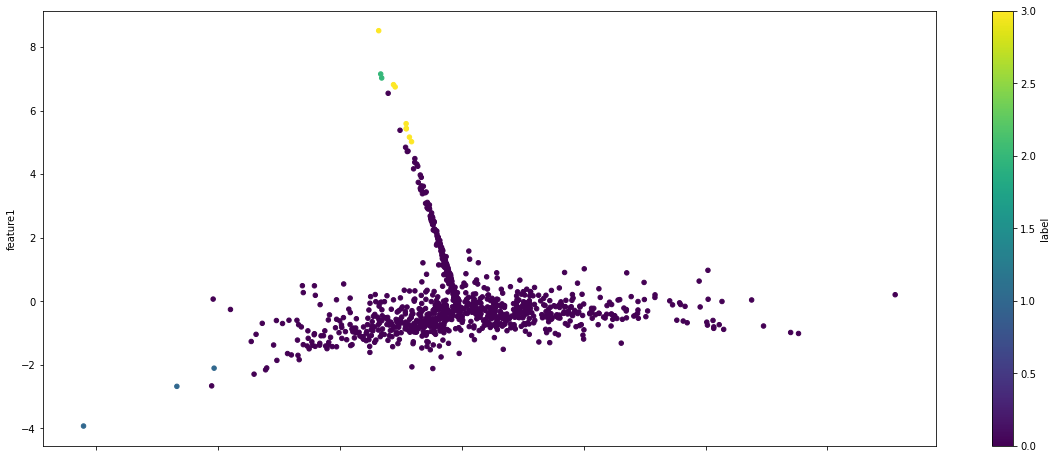

In [310]:
trees = pd.read_csv("./data/bipartition_4taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 4)
plot_SC_cluster(normal_sample, 2),plot_SC_cluster(normal_sample, 3),plot_SC_cluster(normal_sample, 4)

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

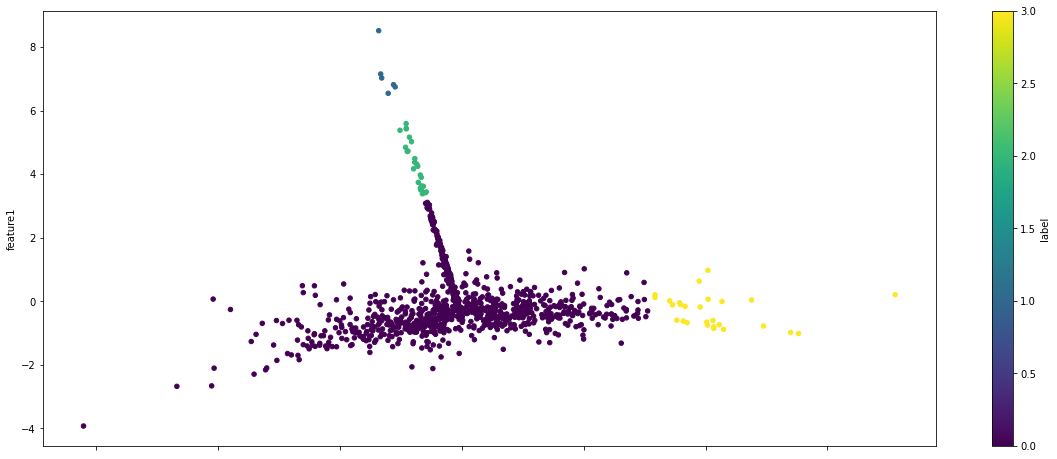

In [312]:
PCA_tree = PCAtrees(normal_sample)
label_df = SC_tree(PCA_tree, 4)
final_df = pd.concat([PCA_tree,label_df], axis = 1)
final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

E:\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
E:\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


(None, None, None)

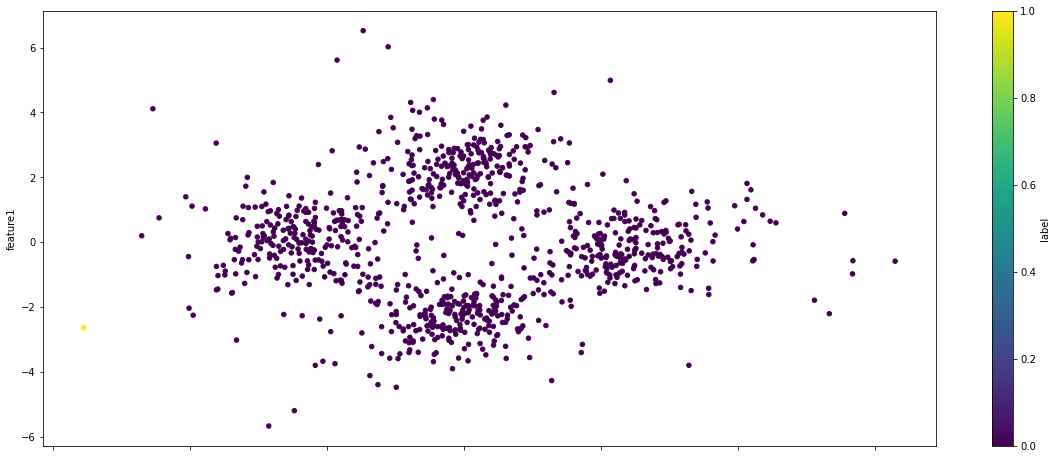

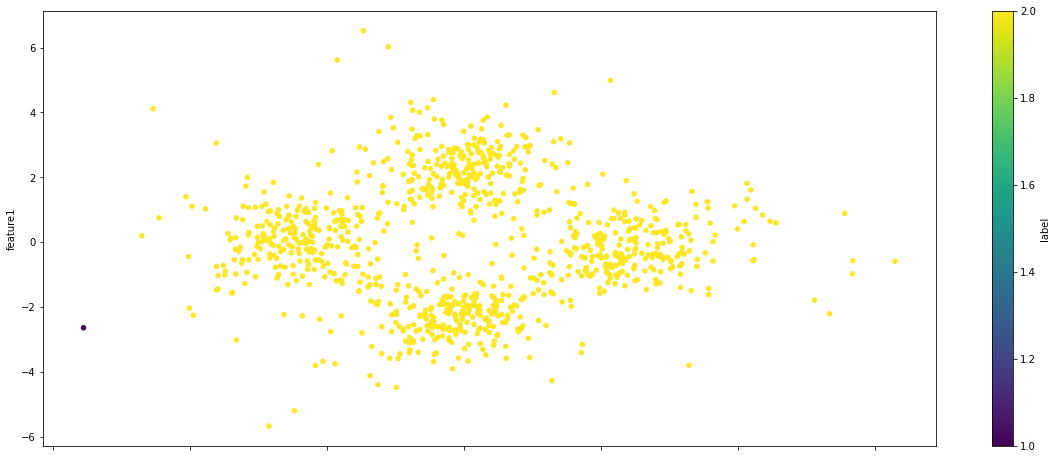

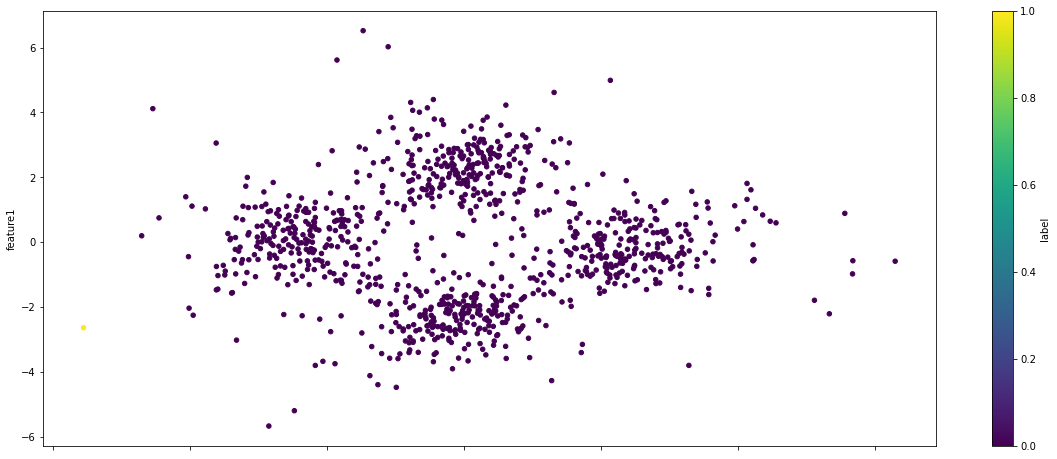

In [313]:
trees = pd.read_csv("./data/bipartition_8taxa_tree.csv")
sample = draw(trees)
normal_sample = normalize(sample, 8)
plot_SC_cluster(normal_sample, 2),plot_SC_cluster(normal_sample, 3),plot_SC_cluster(normal_sample, 4)